#### **Program 1:**
#### **1. Implement exhaustive search techniques using:**

#### a. Breadth First Search:

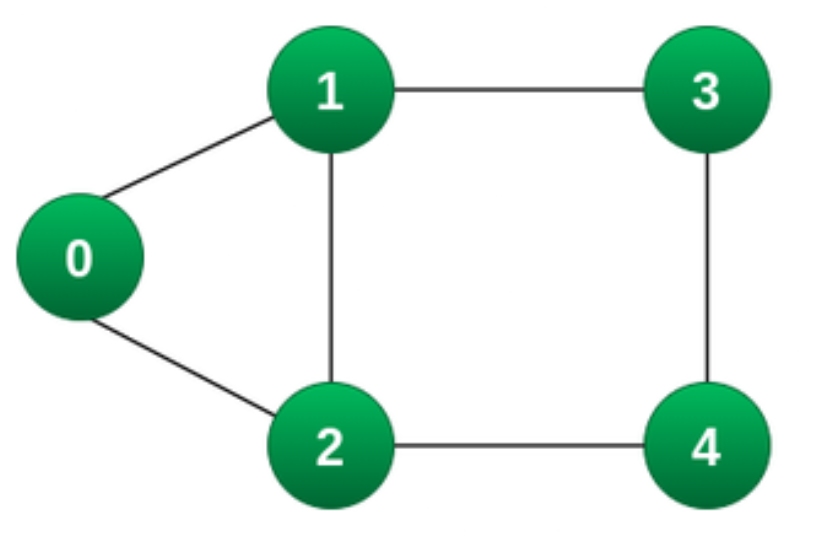

In [11]:
def BFS(graph, start, goal):
    explored = [start]
    frontier = [start]
    traversal = []
    
    print()
    print(f"Frontier: {frontier}")
    print(f"Explored: {explored}")

    while frontier:
        node = frontier.pop(0)

        print()
        print(f"Frontier: {frontier}")
        print(f"Explored: {explored}")

        if node in graph:
            traversal += [node]

        if node == goal:
            return True, traversal

        for neighbour in graph.get(node, []):
            if neighbour not in explored:
                explored += [neighbour]
                frontier += [neighbour]
    
    return False, traversal

In [12]:
graph = {0:[1,2],
         1:[0,2,3],
         2:[0,1,4],
         3:[1,4],
         4:[2,3]}

start_node = int(input("Enter the start node: "))
goal_node = int(input("Enter the goal node: "))

found, traversal = BFS(graph, start_node, goal_node)

if found:
    print("\nGoal node found.\n\nPath: ",end="")
    for i in traversal:
        print(i,end=' ')
else:
    print("\nGoal node not found.")

Enter the start node:  0
Enter the goal node:  4



Frontier: [0]
Explored: [0]

Frontier: []
Explored: [0]

Frontier: [2]
Explored: [0, 1, 2]

Frontier: [3]
Explored: [0, 1, 2, 3]

Frontier: [4]
Explored: [0, 1, 2, 3, 4]

Frontier: []
Explored: [0, 1, 2, 3, 4]

Goal node found.

Path: 0 1 2 3 4 

#### b. Depth First Search:

<img src="BFS.png" width=30%>

In [13]:
def DFS(graph, start, goal):
    explored = [start]
    frontier = [start]
    traversal = []

    print()
    print(f"Frontier: {frontier}")
    print(f"Explored: {explored}")

    while frontier:
        node = frontier.pop()

        print()
        print(f"Frontier: {frontier}")
        print(f"Explored: {explored}")

        if node in graph:
            traversal += [node]

        if node == goal:
            return True, traversal

        for neighbour in graph.get(node, []):
            if neighbour not in explored:
                explored += [neighbour]
                frontier += [neighbour]

    return False, traversal

In [14]:
graph = {0:[1,2],
         1:[0,2,3],
         2:[0,1,4],
         3:[1,4],
         4:[2,3]}

start_node = int(input("Enter the start node: "))
goal_node = int(input("Enter the goal node: "))

found, traversal = DFS(graph, start_node, goal_node)

if found:
    print("\nGoal node found.\n\nPath: ",end="")
    for i in traversal:
        print(i,end=" ")
else:
    print("\nGoal node not found.")

Enter the start node:  0
Enter the goal node:  4



Frontier: [0]
Explored: [0]

Frontier: []
Explored: [0]

Frontier: [1]
Explored: [0, 1, 2]

Frontier: [1]
Explored: [0, 1, 2, 4]

Goal node found.

Path: 0 2 4 

#### c. Uniform Cost Search:

<img src="UCS.png" width=30%>

In [15]:
def UCS(graph, start, goal):
    frontier = {start:0}
    explored = []

    while True:
        if len(frontier) == 0:
            return 'FAIL'

        node = min(frontier, key=frontier.get)
        value = frontier[node]
        print(node, " : ", value)

        del frontier[node]

        if goal == node:
            return value
        explored.append(node)

        for neighbour, pathCost in graph[node].items():
            if neighbour not in explored or neighbour not in frontier:
                frontier.update({neighbour : value + pathCost})
            elif neighbour in frontier and pathCost > value:
                frontier.update({neighbour: value})

In [16]:
graph = {'S': {'F': 99, 'R': 80},
         'F': {'B': 211},
         'R': {'P': 97},
         'P': {'B': 101},
         'B': {}}

start_node = input("Enter the start node: ").upper()
goal_node = input("Enter the goal node: ").upper()

if start_node not in graph:
    print(f"\n{start_node} is not in the graph.")
elif goal_node not in graph:
    print(f"\n{goal_node} is not in the graph.")
else:
    print(f"\nCosts from {start_node} to: ")
    result = UCS(graph, start_node, goal_node)

    if result == "FAIL":
        print("\nGoal node not reached.")
    else:
        print(f"\nGoal reached with cost: {result}")

Enter the start node:  S
Enter the goal node:  B



Costs from S to: 
S  :  0
R  :  80
F  :  99
P  :  177
B  :  278

Goal reached with cost: 278


#### d. Depth Limited Search:

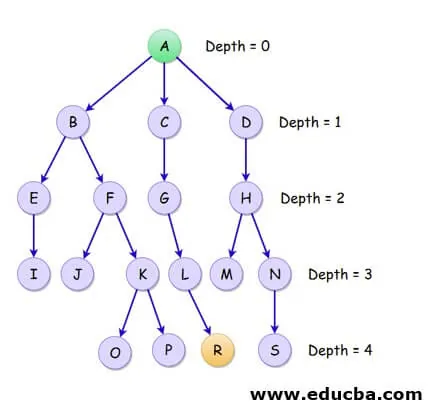

In [17]:
def DLS(graph, start, goal, limit):
    if start == goal:
        print(start)
        return 'GOAL'
    elif limit == 0:
        return "LIMIT"
    else:
        cutoff = False
        print(start, end=' ')
        for neighbour in graph.get(start, []):
            result = DLS(graph, neighbour, goal, limit-1)
            if result == "LIMIT":
                cutoff = True
            elif result != "FAIL":
                return result
        return "LIMIT" if cutoff else "FAIL"

In [20]:
graph = {'A':['B','C','D'],
         'B':['E','F'],
         'C':['G'],
         'D':['H'],
         'E':['I'],
         'F':['J','K'],
         'G':['L'],
         'H':['M','N'],
         'I':[],
         'J':[],
         'K':['O','P'],
         'L':['R'],
         'M':[],
         'N':['S'],
         'O':[],
         'P':[],
         'Q':[],
         'R':[],
         'S':[]}

start_node = input("Enter the start node: ")
goal_node = input("Enter the goal node: ")
limit = int(input("Enter the depth limit: "))

print("\nPath: ",end="")
result = DLS(graph, start_node, goal_node, limit)

if result == "GOAL":
    print("\nGoal node found.")
else:
    print("\nGoal node not found.")

Enter the start node:  A
Enter the goal node:  R
Enter the depth limit:  4



Path: A B E I F J K C G L R

Goal node found.


#### e. Iterative Deepening Depth First Search:

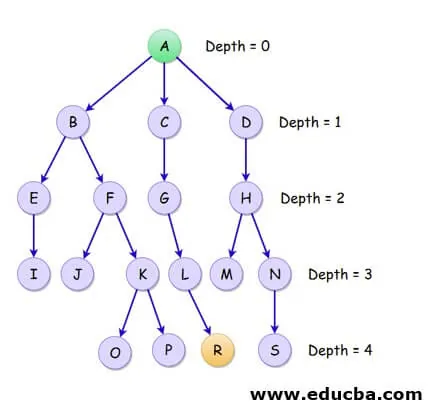

In [21]:
def IDDFS(graph, start, goal):
    for depth in range(100):
        print(f"\nDepth {depth}:")
        result = DLS(graph, start, goal, depth)
        if result != 'LIMIT':
            return result

In [23]:
graph = {'A':['B','C','D'],
         'B':['E','F'],
         'C':['G'],
         'D':['H'],
         'E':['I'],
         'F':['J','K'],
         'G':['L'],
         'H':['M','N'],
         'I':[],
         'J':[],
         'K':['O','P'],
         'L':['R'],
         'M':[],
         'N':['S'],
         'O':[],
         'P':[],
         'Q':[],
         'R':[],
         'S':[]}

start_node = input("Enter the start node: ")
goal_node = input("Enter the goal node: ")

result = IDDFS(graph, start_node, goal_node)

if result == "GOAL":
    print("\nGoal node found.")
else:
    print("\nGoal node not found.")

Enter the start node:  A
Enter the goal node:  R



Depth 0:

Depth 1:
A 
Depth 2:
A B C D 
Depth 3:
A B E F C G D H 
Depth 4:
A B E I F J K C G L R

Goal node found.


#### f. Bidirectional Search:

<img src="BDS.png" width=40%>

In [13]:
def BFS(direction, graph, frontier, explored):
    d = 'c' if direction=='F' else 'p'

    node = frontier.pop(0)
    
    for child in graph.get(node, []).get(d, []):
        if child not in explored:
            frontier += [child]
            explored += [child]
                
    return frontier, explored

def intersecting(exploredF, exploredB):
    intersect = set(exploredF).intersection(set(exploredB))
    return list(intersect)[0] if intersect else -1

def BidirectionalSearch(graph, source, destination):
    frontierF = [source]
    exploredF = [source]
    
    frontierB = [destination]
    exploredB = [destination]

    while frontierF and frontierB:
        frontierF, exploredF = BFS('F', graph, frontierF, exploredF)
        frontierB, exploredB = BFS('B', graph, frontierB, exploredB)

        intersectingNode = intersecting(exploredF, exploredB)

        if intersectingNode != -1:
            print("\nGoal node found.\n\nPath: ", end="")
            path = exploredF[:-1] + exploredB[::-1]
            for i in path:
                print(i, end=" ")
            return
            
    print("Goal node not found.")

In [14]:
graph = {0: {'c': [4], 'p':[]},
         1: {'c': [4], 'p':[]},
         2: {'c': [5], 'p':[]},
         3: {'c': [5], 'p':[]},
         4: {'c': [6], 'p':[0, 1]},
         5: {'c': [6], 'p':[2, 3]},
         6: {'c': [7], 'p':[4, 5]},
         7: {'c': [8], 'p':[6]},
         8: {'c': [9, 10], 'p': [7]},
         9: {'c': [11, 12], 'p': [8]},
         10: {'c': [13, 14], 'p': [8]},
         11: {'c': [], 'p': [9]},
         12: {'c': [], 'p': [9]},
         13: {'c': [], 'p': [10]},
         14: {'c': [], 'p': [10]}}

start_node = int(input("Enter the start node: "))
goal_node = int(input("Enter the goal node: "))

BidirectionalSearch(graph, start_node, goal_node)

Enter the start node:  0
Enter the goal node:  14



Goal node found.

Path: 0 4 6 7 8 10 14 